<a href="https://colab.research.google.com/github/arthurweslen/PowerQuery_DAX/blob/main/DAX/RANKX%20TOPN%20CROSSJOIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RANKX e TOPN

Nesse exemplo,vamos ver a utilização do RANKX e TOPN

RANKX
1) Primeiro usamos o RANKX combinando com o ALL
2) Utilize a medida do total (Que sera usada como parâmetro de valor)
3) Apenas assim já funcina, mas eu forcei o DESC, para pegar do maior para o menor
4) Jogando na tabela, ela tenta mostrar um total, então foi criado uma medida com ISINSCOPE

In [ ]:
Rank Maiores Valores =
VAR RANK_VALORES =
RANKX(
    ALL('bcdata sgs 1378'[Produto]),
    [Total],
    ,
    DESC
)

// #Ao criar Rank Valores, ele coloca o valor 1 no total, e não faz sentido, então essa variável retira.
VAR NAO_SOMAR_RANK =
IF(
    ISINSCOPE('bcdata sgs 1378'[Produto]),
    RANK_VALORES
)

RETURN NAO_SOMAR_RANK

TOPN

1) Coloque a quantidade que deseja *(No exemplo eu coloquei 5,mas poderia ser qualquer número)*
2) Escolha a coluna usando ALL
3) Utilize sua medida de total
4) Crie uma medida com Calculate, medida total e o KEEPFILTES(variavel)

In [ ]:
TOPN (5 Maiores Valores) =
VAR TOP5 =
TOPN(
    5,
    ALL('bcdata sgs 1378'[Produto]),
    [Total])

VAR RESULTADO =
CALCULATE(
    [Total],
    KEEPFILTERS(TOP5))

RETURN RESULTADO

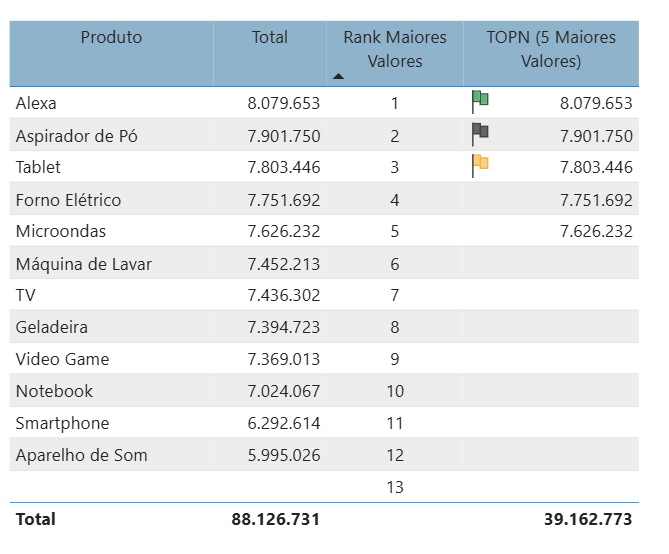

# Segmentando por TOPN

1) Crie uma tabela,usando inserir dados
2) Nela terá todos os TOP desejados

*   No meu exemplo coloquei TOP3, TOP5, TOP10 e TOP20
*   Crie o LimiteMaximo e LImiteMinimo *(Limite maximo tem que ser igual ao TOPN e o limite minimo tem que ser maior que a linha anterior ou numero 1)*




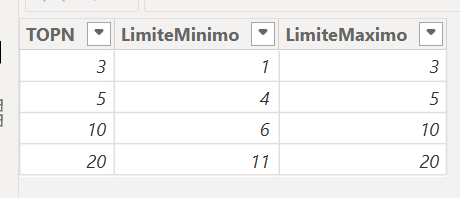



Após criara tabela, será necessário criar a medida

Aqui vamos reutilizar a medida de total e a medida [Rank Maiores Valores]
Essa versão 1 vamos fazer simplesmente menor ou igual a coluna TOPN

In [ ]:
Total Vendido (TOPN)v1 =

CALCULATE(
    [Total],
    FILTER(
        VALUES('bcdata sgs 1378'[Produto]),
        [Rank Maiores Valores] <= MAX(d_Limites[TOPN])))

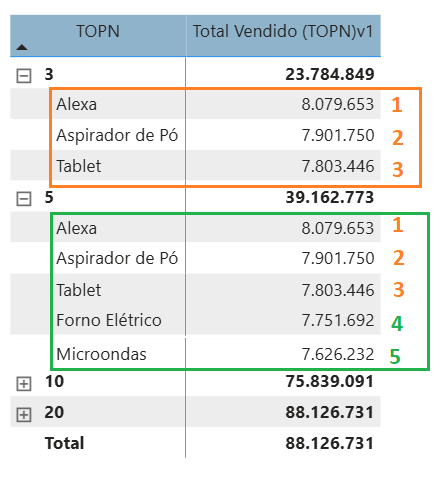

Segunda versão

Na versão anterior, os valores que estão no TOP3 também aparece no TOP5, e assim por diante.

Agora nessa versão vamos mostrar apenas que fazem parte do TOP5, então seria o 4 e 5 lugar



In [ ]:
Total Vendido (TOPN)v2 =

CALCULATE(
    [Total],
    FILTER(
        VALUES('bcdata sgs 1378'[Produto]),
        [Rank Maiores Valores] <= MAX(d_Limites[LimiteMaximo])&&
        [Rank Maiores Valores] >= MIN(d_Limites[LimiteMinimo])
        ))

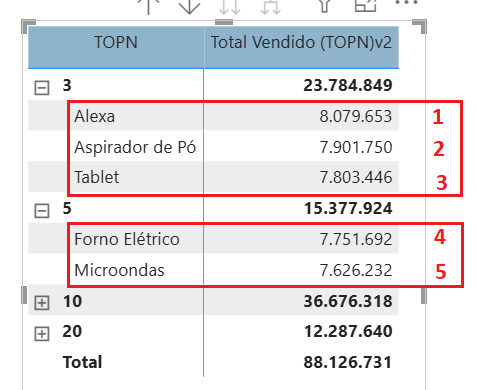

# RANK usando 2 Colunas

Para criar o RANK com duas colunas *(sendo elas da mesma tabela)* fica bem semelhante ao rank anterior

NO exemplo abaixo, vou mostrar a diferença do usar o DENSE e o SKIP * **negrito**(quando o Rank tem empates)*

In [ ]:
RANK com duas colunas da mesma tabela (Dense) =
RANKX(
    ALL(d_Produto[Categoria],d_Produto[Produto]),
    [Total Vendido],
    ,
    ,Dense)


In [ ]:
RANK com duas colunas da mesma tabela (Skip) =
RANKX(
    ALL(d_Produto[Categoria],d_Produto[Produto]),
    [Total Vendido],
    ,
    ,Skip)

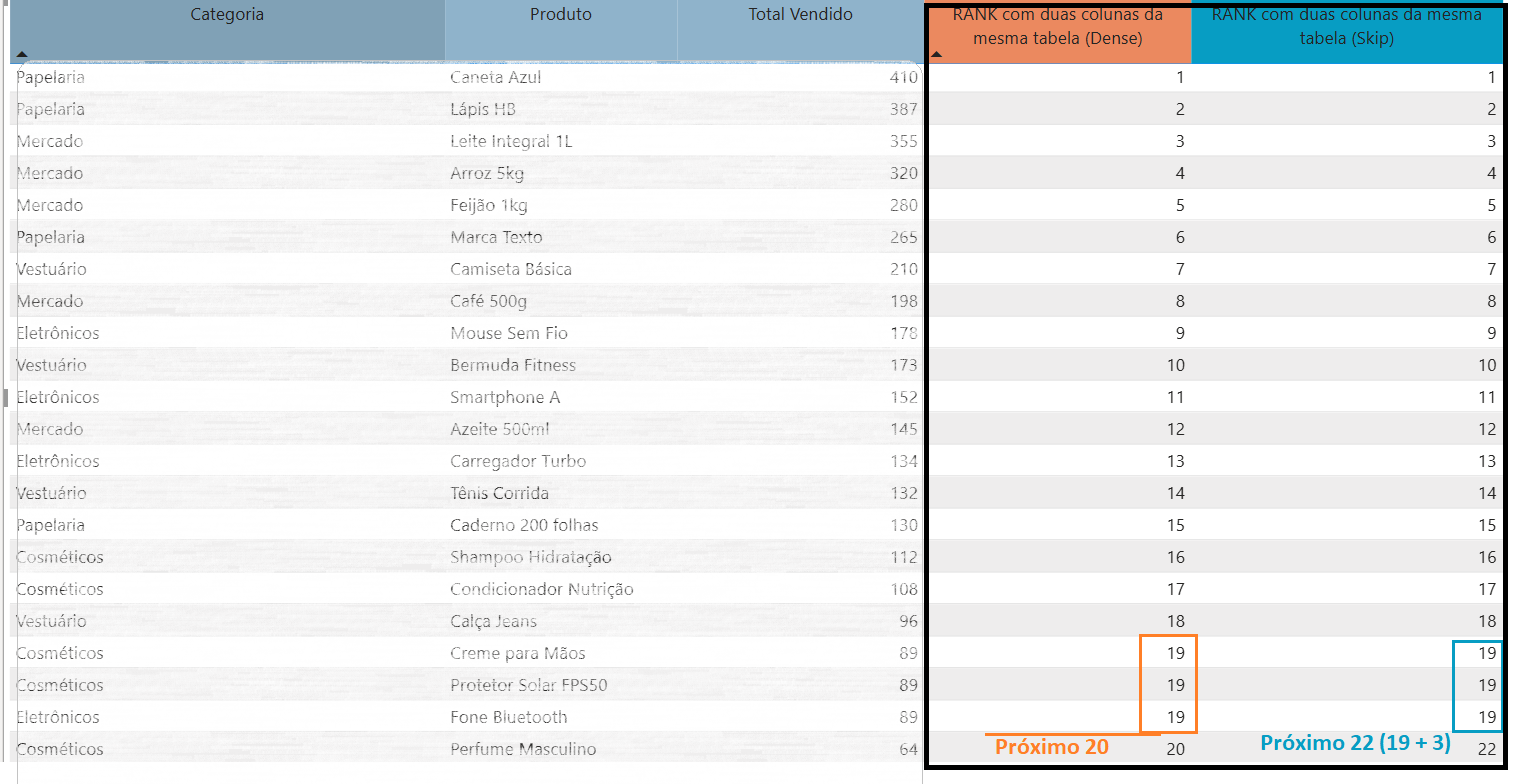

## **RANK com colunas de tabelas Distintas**

Para criar um rank que as colunas estão em tabelas diferentes, devemos utilizar o **CROSSJOIN**

In [ ]:
RANK com duas colunas em tabelas distintas =
RANKX(
    CROSSJOIN(
        ALL(d_Produto[Categoria]),
        ALL(d_Gerencia[Gerente])),
    [Total Vendido])


In [ ]:
RANK com duas colunas em tabelas distintas V2 =
VAR RANK_2_COL =
RANKX(
    CROSSJOIN(
        ALL(d_Produto[Categoria]),
        ALL(d_Gerencia[Gerente])),
    [Total Vendido])

VAR NAO_SOMAR_TOTAL =
IF(
    ISINSCOPE(d_Produto[Categoria]) &&
    ISINSCOPE(d_Gerencia[Gerente]),RANK_2_COL)

RETURN NAO_SOMAR_TOTAL

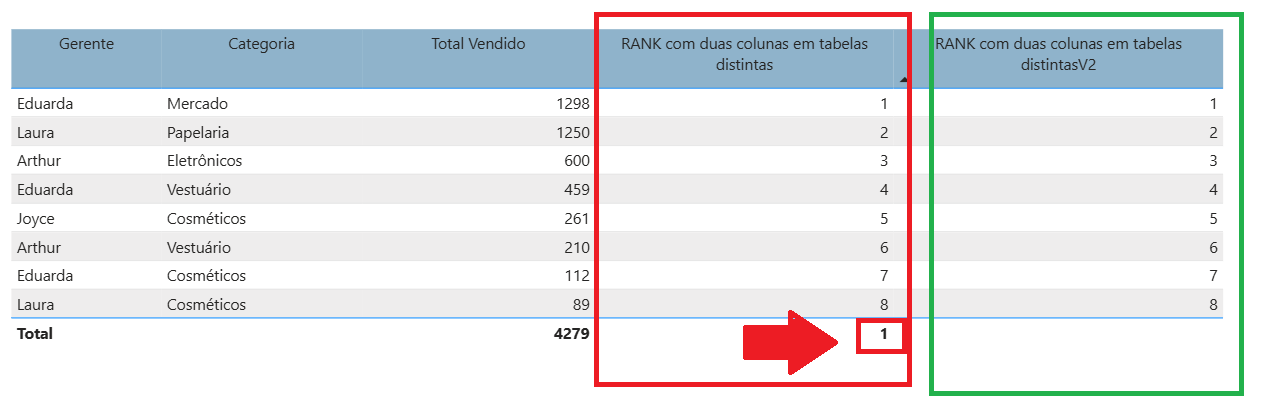

# **Desempatando valores**

Para desempatar colunas, podemos utilizar outra coluna como parâmetro.
Aqui eu inseri medida [Qtd Vendida]

A lógica é o seguinte:
Se Tem produtos que tem o mesmo valor vendido, mas no meu exemplo, não tem a mesma quantidade vendida.

In [ ]:


RANK Desempatando =
RANKX(
    ALL(d_Produto[Categoria],d_Produto[Produto]),
    [Total Vendido R$]+ [Qtd Vendida]
    ,
    ,
    ,Dense)


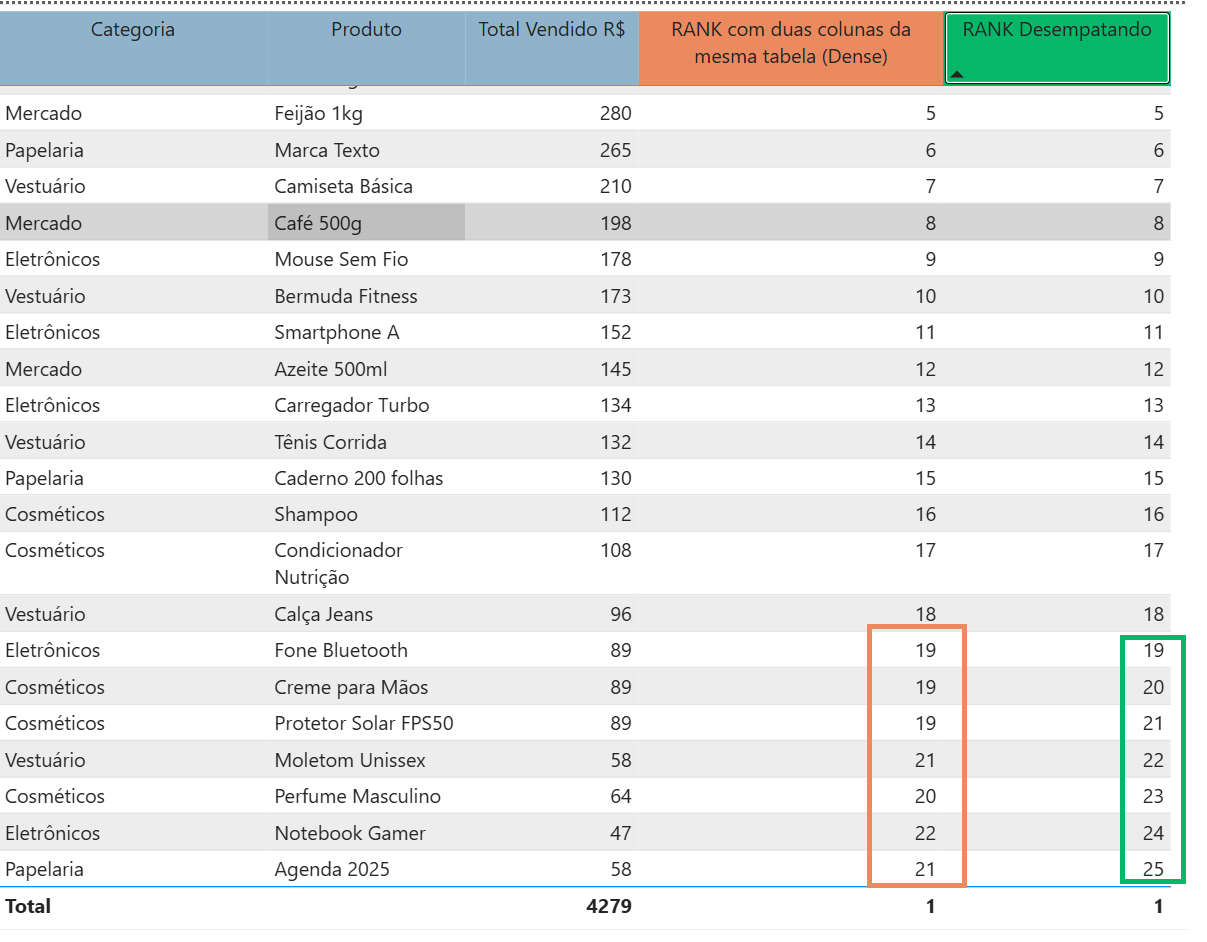

## **USANDO o RANK ao invés de RANKX**

Ela tem uma estrutura um pouco diferente, mas não precisa criar aquela medida VAR NAO_SOMAR_TOTAL, e ela tem a opção de escolher outra coluna ou medida para desempate

• (documentação https://learn.microsoft.com/pt-br/dax/rank-function-dax)

In [ ]:
RANK (Desempate ordem alfabética) =

RANK(
    DENSE,
    ALLSELECTED(d_Produto[Produto]),
    ORDERBY(
        [Total Vendido R$],
        DESC,
        d_Produto[Produto], //# Coluna de Desempate
        ASC) //# Aqui avalia a coluna Produto em ordem alfabética
)

In [ ]:
RANK (Desempate utilizando outra medida) =

RANK(
    DENSE,
    ALLSELECTED(d_Produto[Produto]),
    ORDERBY(
        [Total Vendido R$],
        DESC,
        f_Fato[Qtd Vendida], //# Medida de Desempate
        ASC) //# Ordena de forma ascendente utilizand a [Qtd Vendida]
)

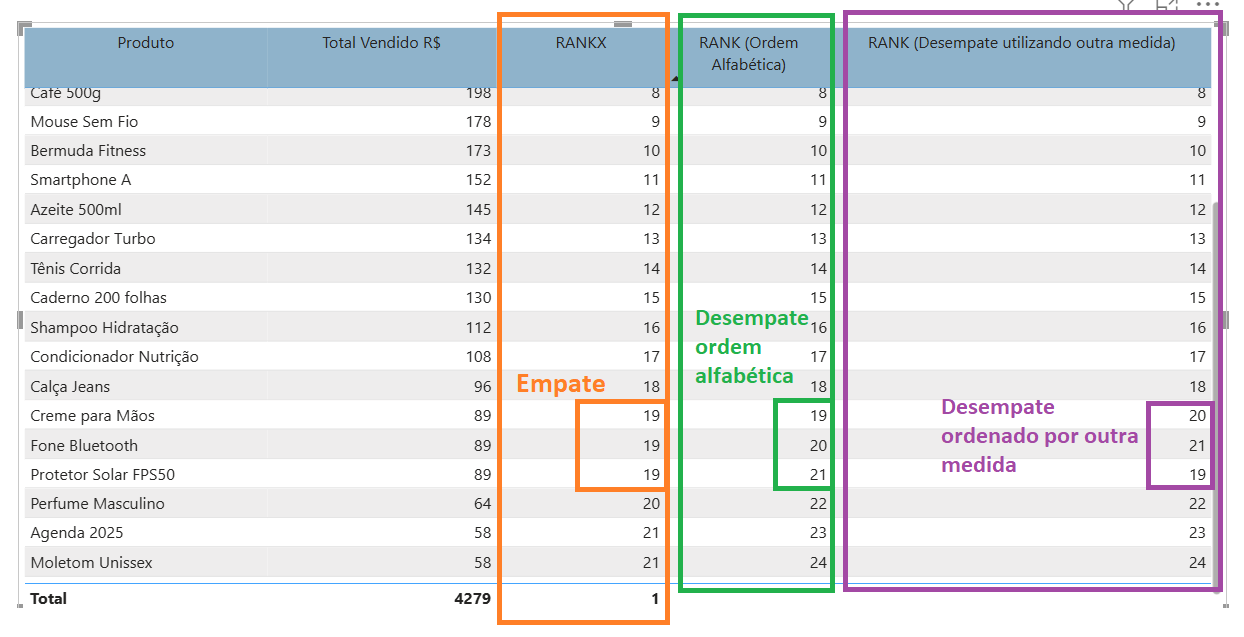